# Introduction to Data Science
## Homework 5

Student Name: Yuhan Liu

Student Netid: yl7576
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!

Laplace smoothing solves the unknown word problem by assigning a small probability to the unknown word by adding a constant to both numerator and denominator of the conditional probability equation. For exmaple, assume that we have a movie review. The probability of word 'good' given words (w1, w2, ..., wn) is 0.8 and the probability of the word 'bad' given words (w1, w2, ..., wn) is 0.2. Then in the test data, there is a piece of review with almost the same content but containing an unknown word (a word not in the training vocabulary). In this way, the word count is 0 and the probability of 'good' and 'bad' given that word is 0. As the result, the classifier may not put the review into correct category even though it is almost the same as the good review we trained. Therefore, we can say that Laplace smoothing smoothes uncertainties existing in the test set. In terms of bias-variance tradeoff, Laplace smoothing helps the model reduce the variance in the overfitting case.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [2]:
import pandas as pd


In [8]:
df = pd.read_csv("imdb.csv")
df.head()


,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [9]:
df['Class'] = df.apply(lambda x: 1 if x['Class']=='P' else 0, axis=1)
df.head()


,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis = 1)
Y = df.drop('Text', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english",binary=True,ngram_range=(1,2))
count_vectorizer.fit(X_train['Text'])
X_train_count = count_vectorizer.transform(X_train['Text'])
X_test_count = count_vectorizer.transform(X_test['Text'])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",binary=True,ngram_range=(1,2))
tfidf_vectorizer.fit(X_train['Text'])
X_train_tfidf = tfidf_vectorizer.transform(X_train['Text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Text'])


5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [20]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Code here
lr_count = LogisticRegression()
lr_count.fit(X_train_count, Y_train)
fpr_lr_count, tpr_lr_count, thresholds_lr_count = metrics.roc_curve(Y_test, lr_count.predict_proba(X_test_count)[:,1])
lr_count_auc = metrics.auc(fpr_lr_count, tpr_lr_count)


ber_count = BernoulliNB()
ber_count.fit(X_train_count, Y_train)
fpr_ber_count, tpr_ber_count, thresholds_ber_count = metrics.roc_curve(Y_test, ber_count.predict_proba(X_test_count)[:,1])
ber_count_auc = metrics.auc(fpr_ber_count, tpr_ber_count)

lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, Y_train)
fpr_lr_tfidf, tpr_lr_tfidf, thresholds_lr_tfidf = metrics.roc_curve(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1])
lr_tfidf_auc = metrics.auc(fpr_lr_tfidf, tpr_lr_tfidf)

ber_tfidf = BernoulliNB()
ber_tfidf.fit(X_train_tfidf, Y_train)
fpr_ber_tfidf, tpr_ber_tfidf, thresholds_ber_tfidf = metrics.roc_curve(Y_test, ber_tfidf.predict_proba(X_test_tfidf)[:,1])
ber_tfidf_auc = metrics.auc(fpr_ber_tfidf, tpr_ber_tfidf)

/Users/yuhanliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yuhanliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yuhanliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yuhanliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

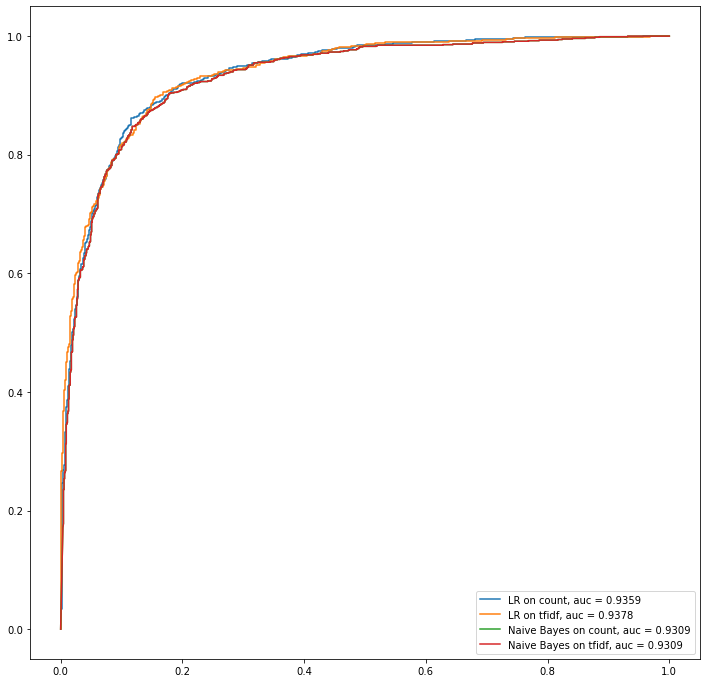

In [35]:
plt.plot(fpr_lr_count,tpr_lr_count,label="LR on count, auc = {0:.4f}".format(lr_count_auc,2))
plt.plot(fpr_lr_tfidf,tpr_lr_tfidf,label="LR on tfidf, auc = {0:.4f}".format(lr_tfidf_auc))
plt.plot(fpr_ber_count,tpr_ber_count,label="BernoulliNB on count, auc = {0:.4f}".format(ber_count_auc))
plt.plot(fpr_ber_tfidf,tpr_ber_tfidf,label="BernoulliNB on tfidf, auc = {0:.4f}".format(ber_tfidf_auc))
plt.legend(loc="lower right")

Explanation here!

Q1: Which model do you think does a better job? Why?

Logistic regression on tfidf works the best because it has the highest auc score among four models. BernoulliNB does not work as well as logistic regression because it assumes words are independent to each other, but the fact is that the position of words highly depend on context and word sequence. Therefore, Logistic works better. Also, for the logistic regression model, TFIDFVectorizer works better than CountVectorizer because CountVectorizer only simply counts the word frequency but TFIDFVectorizer counts the inverse document frequency, which adjusts for the fact that some words appear more frequently in general. Therefore, logistic regression on tfidf is the best model.

Extra Credit Question:

Naive Bayes model on count and Naive Bayes model on tfidf perform identically and they are the worst two models among the four. I think that is because Naive Bayes model is not as good as logistic so it does not make any differences on CountVectorizer or TFIDFVectorizer. 

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [41]:
# Code here to display 5 incorrect reviews.
best_clf = LogisticRegression()
best_clf.fit(X_train_tfidf, Y_train)
preds = best_clf.predict(X_test_tfidf)
ct =0
for i in range(len(preds)):
    if (ct >= 5): 
        break
    if (Y_test['Class'].iloc[i] == 1) and (preds[i] != 1):
        ct += 1
        print('review: \n')
        print(X_test['Text'].iloc[i]+'\n')


/Users/yuhanliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


review: 

'Although its not as creepy as its cult classic predecessor (ZOMBI 2) I actually like this one better. This is because of its faster pace better settings and cool 80s soundtrack. Its loaded with action and has sweet gore effects by Lucio Fulci. The zombies dont quite look as nasty as in ZOMBI 2 but they still look good. It was made pretty well but it definitely has its share of cheesiness; for instance some zombies move really slow while others are as quick as ninjas. some are braindead while others say funny lines but who expects consistency when it comes to Italian horror? Theres even a flying zombie head! How rad is that? Definitely a must see for gorehounds and zombie fans. itd probably satisfy most fans of action movies as well. Also check out Zombi 4.'

review: 

'I wasnt expecting much and to be honest I didnt like this film the first time around but watching it again and I realised that its kinda cool. Sure its a one joke film but its a funny gag.  Someone posted that

Explanation here!

These are positive reviews but being uncorrectly classified as negative. This is because in these reviews, there are negative words that confuse the classifier, such as 'fool', 'tart', 'clichéd' and 'painfully dull', but the classifier does not capture transitional words such as‘but' and 'however', which make the review become positive. That is why positive reviews are labeled as negative.